# Cost function

Lets delve a bit deeper and look at the <code>**cost fuction**</code> and what is it doing. I assume that you have some familiarity with contour plots. If not, some things may not make sense to you but it's okay.

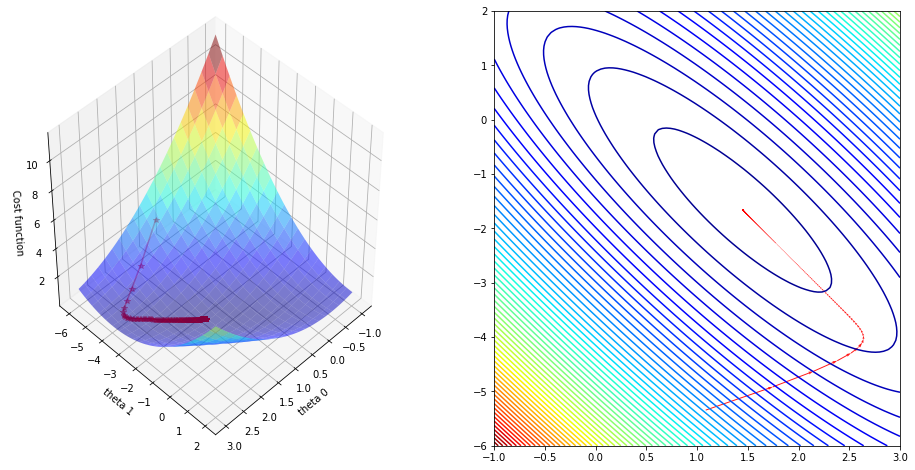

<code>**Hypothesis**</code>:
\begin{multline*}
h_{\theta}(x) = \theta_{0} + \theta_{1}x
\end{multline*}

<code>**Parameters**</code>:
\begin{multline*}
\theta_{0}, \theta_{1}
\end{multline*}

<code>**Cost function**</code>:
\begin{multline*}
J(\theta_{0}, \theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Goal**</code>:
\begin{multline*}
\min\theta_{0}, \theta_{1}  J(\theta_{0}, \theta_{1})
\end{multline*}

We will keep now both parameters <code>**θ 0 and θ 1**</code> on visualizations for cost function. To undestand hypothesis H and the cost function. So at the last lecture [__linear_regression_I](./__linear_regression_I.ipynb) we will have a training set. And lets make some hypothesis and abviously its not very good hypothesis.

Text(0, 0.5, "Price in 1000's")

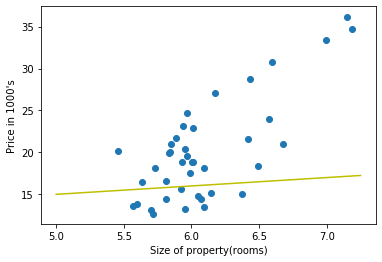

In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.datasets import load_boston
data_set = load_boston()

# TODO: reshape linespace by data samples space ----
x = np.linspace(5,7.25,100)
theta_0 = 10
theta_1 = 1
y =  theta_0 +  theta_1* x
plt.plot(x, y, '-y')
# ---------------------------------------------------

plt.scatter(data_set.data[:40,5], data_set.target[:40],)
plt.xlabel("Size of property(rooms)")
plt.ylabel("Price in 1000's")

So with θ 0 and θ 1 being 10 and 1 we want to plot coresponding cost function.
<br>

\begin{multline*}
J(\theta_{0}, \theta_{1})
\end{multline*}

And its going look differently and more complicated because we have now two parameters. With one parameter is was a parabola function and in fact with two parameters it still has this parabola shape but in more dimensions.

<IPython.core.display.Javascript object>


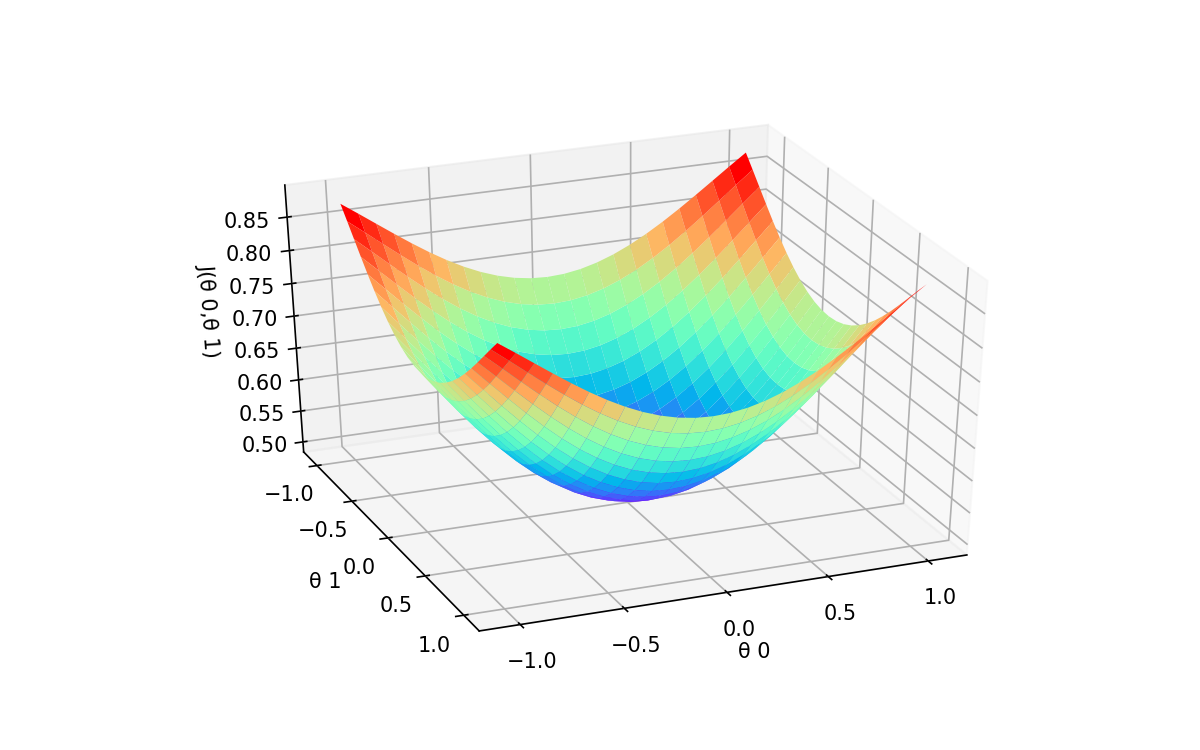

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 5),  subplot_kw={'projection': '3d'})
alpha = 1
r = np.linspace(-alpha,alpha,25)
X,Y= np.meshgrid(r,r)
l = 1./(1+np.exp(-(X**2+Y**2)))
ax.plot_surface(X, Y, l, cmap = 'rainbow')
ax.set_xlabel('θ 0')
ax.set_ylabel('θ 1')
ax.set_zlabel('J(θ 0,θ 1)')
ax.view_init(45, 45)
plt.show()

Its a 3D surface plot that looks like bowl like shape. Where the axis are labeled  θ 0 and θ 1. As we varry our parameters we get different values of the cost function J(θ 0, θ 1). And the height of this surface above θ 0 and θ 1 indicates the value of <code>**J(θ 0,θ 1)**</code>
But further for simplicity and convenience sake we will use <code>**[contour plots](https://www.youtube.com/watch?v=acdX4YamDtU) <<<**</code> (Thas a good video to get familiar with controur plots) to demonstrate this surfaces. And example contour figure below where the axes are theta parameters. And each of this oval show set of points that takes on the same value for J(θ 0,θ 1), i have marked <code>**three (black) x values that all have the same value for J(θ 0,θ 1)**</code>


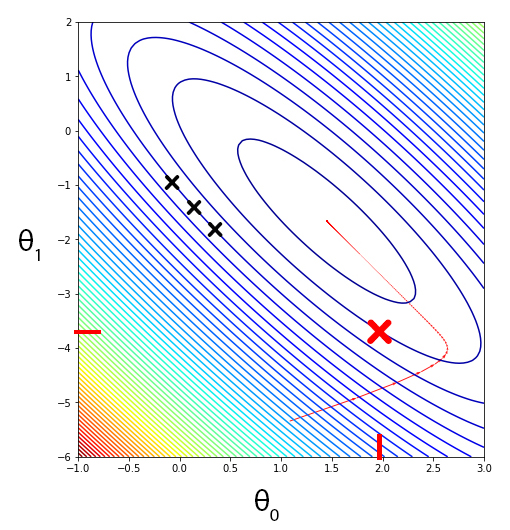

We have a particulalr point. And this is where theta 0 equal ~ 2 and theta 1 equal ~ 4.2. This one particular point coresspond to one set of pair values of theta parameters and they correspond to some hypothesis. Which i can tell is not a good fit to the data. Because it cost out there is prett far away from the <code>**minimum**</code>

--Prideti pavyzdžių su hipoteze ir klaidos funkcija--

With all of these figure, we have some understanding how values of the cost function J corresponds to different hypothesis and so as how better hypothesis can correspond to points tat are closer to the minimu of this cost function J. So in reality what we want is an <code>**efficient algorithm for effective finding the value of theta parameters that minimizes the cost function J.**</code>


## Gradient descent

This is algorithm for minimizing the cost functioj J. Its more general algorithm and its not used only in linear regression. Its used all over the field of machine learning and can be used to minimize oter functions as well not just the cost function. 
Sofirsly lets discuss the minimazation of some arbitraty function J and later take this algorithm and apply it specifically to the cost function J that we have defined for linear regression.

## Draft

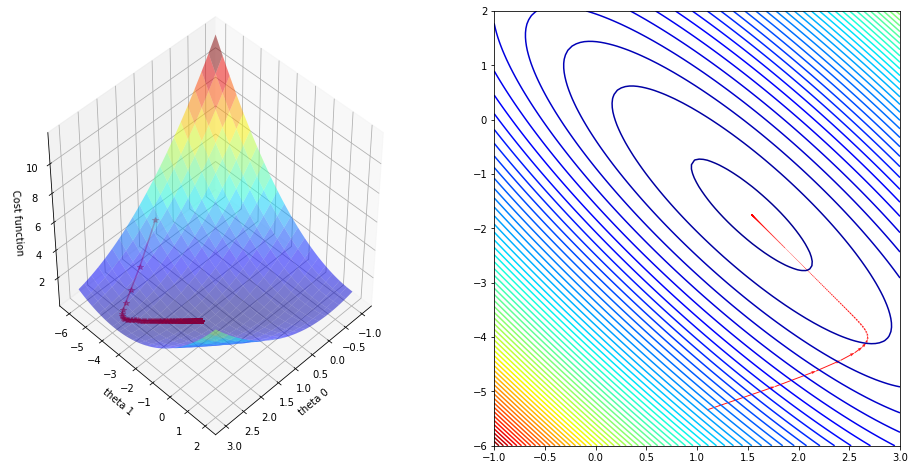

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards

    for i in range(num_iters):
        #Grad function in vectorized form
        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
# ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()